<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Data Science Para Análise Multivariada de Dados</font>
## <font color='blue'>Projeto 4</font>
### <font color='blue'>Data Science em Marketing - Segmentação da Base de Clientes</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [2]:
# Pré-requisito para o K-Means
!pip install -q threadpoolctl==3.1.0

In [3]:
# Imports
import threadpoolctl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Carregando e Explorando os Dados

In [5]:
# Set seed
np.random.seed(42)

In [6]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [7]:
# Shape
df_dsa.shape

(99, 6)

In [8]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                99 non-null     int64  
 1   Gasto_Mensal         99 non-null     float64
 2   Tempo_de_Assinatura  99 non-null     int64  
 3   Taxa_de_Uso          99 non-null     float64
 4   Suporte_Tickets      99 non-null     int64  
 5   Cancelou             99 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 4.8 KB


In [9]:
# Primeiras linhas
df_dsa.head()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
0,48,529.152948,13,0.524262,2,1
1,37,684.502168,13,0.628494,2,0
2,31,797.016155,17,0.706550,1,0
3,30,542.025205,12,0.517458,3,0
4,44,655.498896,15,0.774564,3,0


In [10]:
df_dsa.sample(10)

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
62,38,739.488554,15,0.547594,3,0
40,24,218.509402,1,0.422976,1,0
95,53,999.943535,23,0.865750,5,1
18,28,172.894435,3,0.110168,1,0
97,61,911.086341,22,0.848029,2,1
84,56,918.826143,21,0.879309,2,1
64,46,710.590063,16,0.602564,1,1
42,31,106.254563,5,0.227201,1,0
10,32,588.077553,16,0.691481,0,1
0,48,529.152948,13,0.524262,2,1


## Análise Exploratória e Limpeza de Dados

In [11]:
# Verificando valores nulos
print(df_dsa.isnull().sum())

Idade                  0
Gasto_Mensal           0
Tempo_de_Assinatura    0
Taxa_de_Uso            0
Suporte_Tickets        0
Cancelou               0
dtype: int64


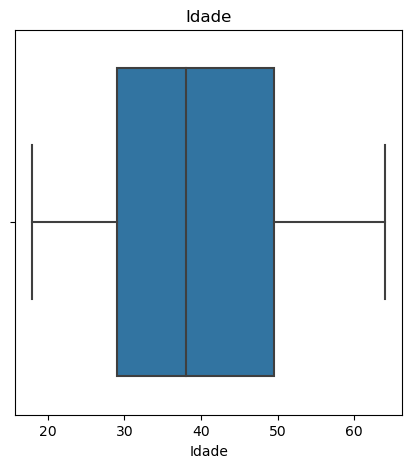

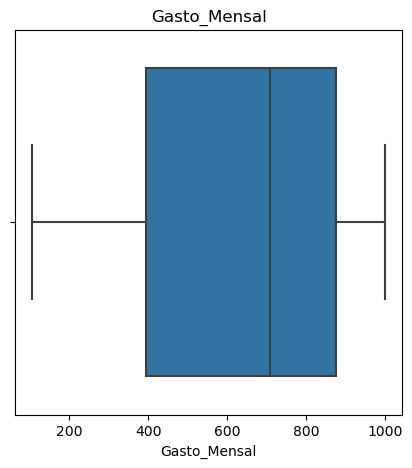

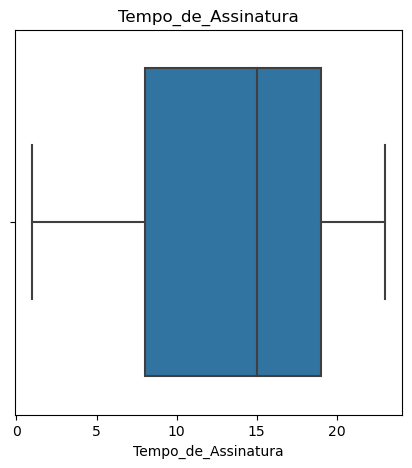

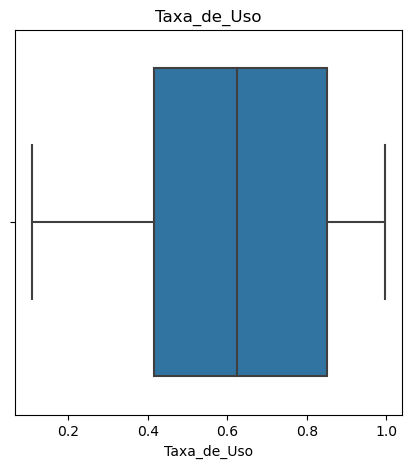

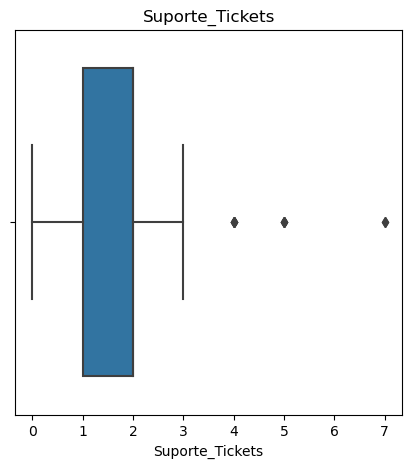

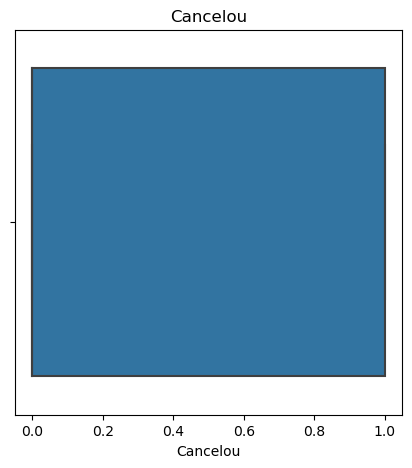

In [12]:
# Visualizando outliers para cada variável no DataFrame
for column in df_dsa.columns:
    if df_dsa[column].dtype in ['int64', 'float64']:  
        plt.figure(figsize = (5, 5))
        sns.boxplot(x = df_dsa[column])
        plt.title(column)
        plt.show()

In [13]:
# Número de registros por categoria da variável
df_dsa.Cancelou.value_counts()

Cancelou
0    50
1    49
Name: count, dtype: int64

In [14]:
df_dsa.describe()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,39.888889,639.071009,13.646465,0.604374,1.747475,0.494949
std,13.089869,270.618268,6.599804,0.263824,1.486974,0.502519
min,18.000000,106.254563,1.000000,0.110168,0.000000,0.000000
25%,29.000000,394.918421,8.000000,0.414928,1.000000,0.000000
50%,38.000000,709.104722,15.000000,0.623406,2.000000,0.000000
75%,49.500000,875.735422,19.000000,0.849839,2.000000,1.000000
max,64.000000,999.943535,23.000000,0.996007,7.000000,1.000000


O algoritmo KMeans utiliza a distância euclidiana entre os pontos para formar clusters. A distância euclidiana é uma medida de quão longe dois pontos estão um do outro no espaço euclidiano, que é o espaço comum que usamos no dia a dia. Imagine que você tenha dois pontos em um pedaço de papel ou em um mapa. A distância euclidiana é a medida do comprimento mais curto entre esses dois pontos, como se você estivesse usando uma régua reta para conectá-los. É a maneira mais direta e comum de medir a distância entre dois pontos em um espaço bidimensional ou tridimensional. Se você pensar em dois pontos em uma linha reta, a distância euclidiana é simplesmente a diferença entre eles. Em um espaço bidimensional, como um plano, é como medir a hipotenusa de um triângulo retângulo formado pelos dois pontos e suas projeções ao longo dos eixos. Em três dimensões, é como medir a linha reta entre dois pontos no espaço.

E o cálcuo de distância será afetado por valores outliers.

In [15]:
# Define o Intervalo Interquartil
Q1 = df_dsa.quantile(0.25)
Q3 = df_dsa.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Idade                   20.500000
Gasto_Mensal           480.817001
Tempo_de_Assinatura     11.000000
Taxa_de_Uso              0.434911
Suporte_Tickets          1.000000
Cancelou                 1.000000
dtype: float64


In [16]:
# Vamos checar os valores que estão 1.5 acima ou abaixo do IQR. Esses valores são considerados outliers.
outliers = ((df_dsa < (Q1 - 2.5 * IQR)) | (df_dsa > (Q3 + 2.5 * IQR))).any(axis = 1)

In [17]:
# Filtramos os outliers
df_outliers = df_dsa[outliers]

In [18]:
# Visualizamos os outliers
df_outliers

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
12,46,743.034018,16,0.697133,5,0
53,48,550.847824,12,0.619646,7,1
54,43,667.040379,13,0.630056,5,0
63,34,694.989179,17,0.536049,7,1
95,53,999.943535,23,0.865750,5,1
96,48,999.327367,21,0.926680,5,1


In [19]:
# Calculando a matriz de correlação
correlation_matrix = df_dsa.corr()

In [20]:
correlation_matrix

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
Idade,1.000000,0.856041,0.814066,0.846363,0.431047,0.624298
Gasto_Mensal,0.856041,1.000000,0.914275,0.912730,0.378802,0.651229
Tempo_de_Assinatura,0.814066,0.914275,1.000000,0.891799,0.427516,0.687107
Taxa_de_Uso,0.846363,0.912730,0.891799,1.000000,0.380526,0.643879
Suporte_Tickets,0.431047,0.378802,0.427516,0.380526,1.000000,0.278220
Cancelou,0.624298,0.651229,0.687107,0.643879,0.278220,1.000000


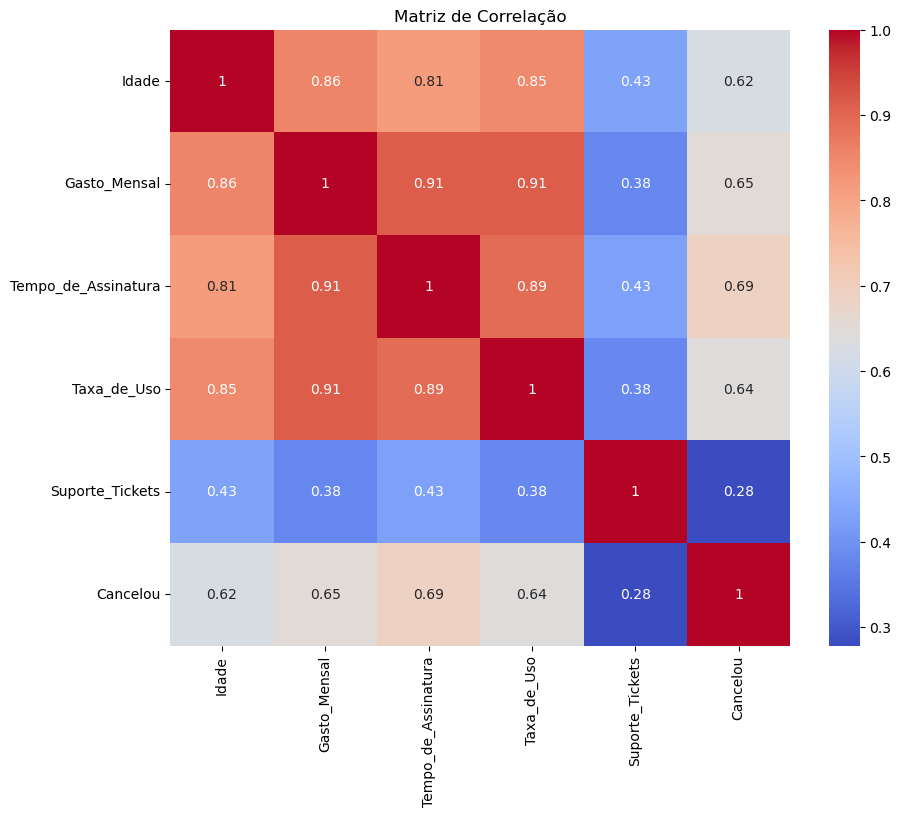

In [21]:
# Plot
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Matriz de Correlação')
plt.show()

A correlação pode ter impacto significativo em modelos de clusterização como o KMeans, pois o KMeans utiliza a distância euclidiana entre os pontos para formar clusters. Variáveis altamente correlacionadas podem influenciar desproporcionalmente as distâncias entre os pontos, levando a possíveis distorções nos clusters formados.

Precisamos considerar os pontos abaixo:

1. Multicolinearidade

Se duas variáveis são altamente correlacionadas (multicolinearidade), isso pode resultar em redundância e pode não agregar valor ao modelo, potencialmente prejudicando a formação de clusters. Você pode remover uma variável quando ela estiver muito correlacionada com outra.

2. Escala das Variáveis

A correlação também pode ser um indicativo da necessidade de normalizar as variáveis, principalmente quando se está lidando com variáveis em escalas diferentes, já que o KMeans é sensível à escala das variáveis.

3. Redução de Dimensionalidade

A análise de correlação pode ser um passo preliminar à aplicação de técnicas de redução de dimensionalidade como PCA (Principal Component Analysis), que pode ser útil para mitigar problemas de multicolinearidade e para acelerar o processo de agrupamento quando se tem um grande número de variáveis.

Portanto, antes de aplicar o KMeans, geralmente é aconselhável realizar os seguintes passos com base na análise de correlação:

- Remoção ou combinação de variáveis altamente correlacionadas para reduzir a multicolinearidade.
- Normalização ou padronização das variáveis para garantir que todas estejam na mesma escala.
- Considerar a redução de dimensionalidade se o conjunto de dados tiver um grande número de variáveis.

In [22]:
# Cria o padronizador
scaler = StandardScaler()

In [23]:
# Padronizando as Variáveis
df_scaled = pd.DataFrame(scaler.fit_transform(df_dsa), columns = df_dsa.columns)

In [24]:
df_scaled.head()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
0,0.622801,-0.408241,-0.098451,-0.305201,0.170689,1.010153
1,-0.221820,0.168733,-0.098451,0.091893,0.170689,-0.989949
2,-0.682522,0.586616,0.510712,0.389261,-0.505240,-0.989949
3,-0.759306,-0.360433,-0.250741,-0.331122,0.846619,-0.989949
4,0.315666,0.061014,0.206131,0.648375,0.846619,-0.989949


In [25]:
df_dsa.head()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
0,48,529.152948,13,0.524262,2,1
1,37,684.502168,13,0.628494,2,0
2,31,797.016155,17,0.706550,1,0
3,30,542.025205,12,0.517458,3,0
4,44,655.498896,15,0.774564,3,0


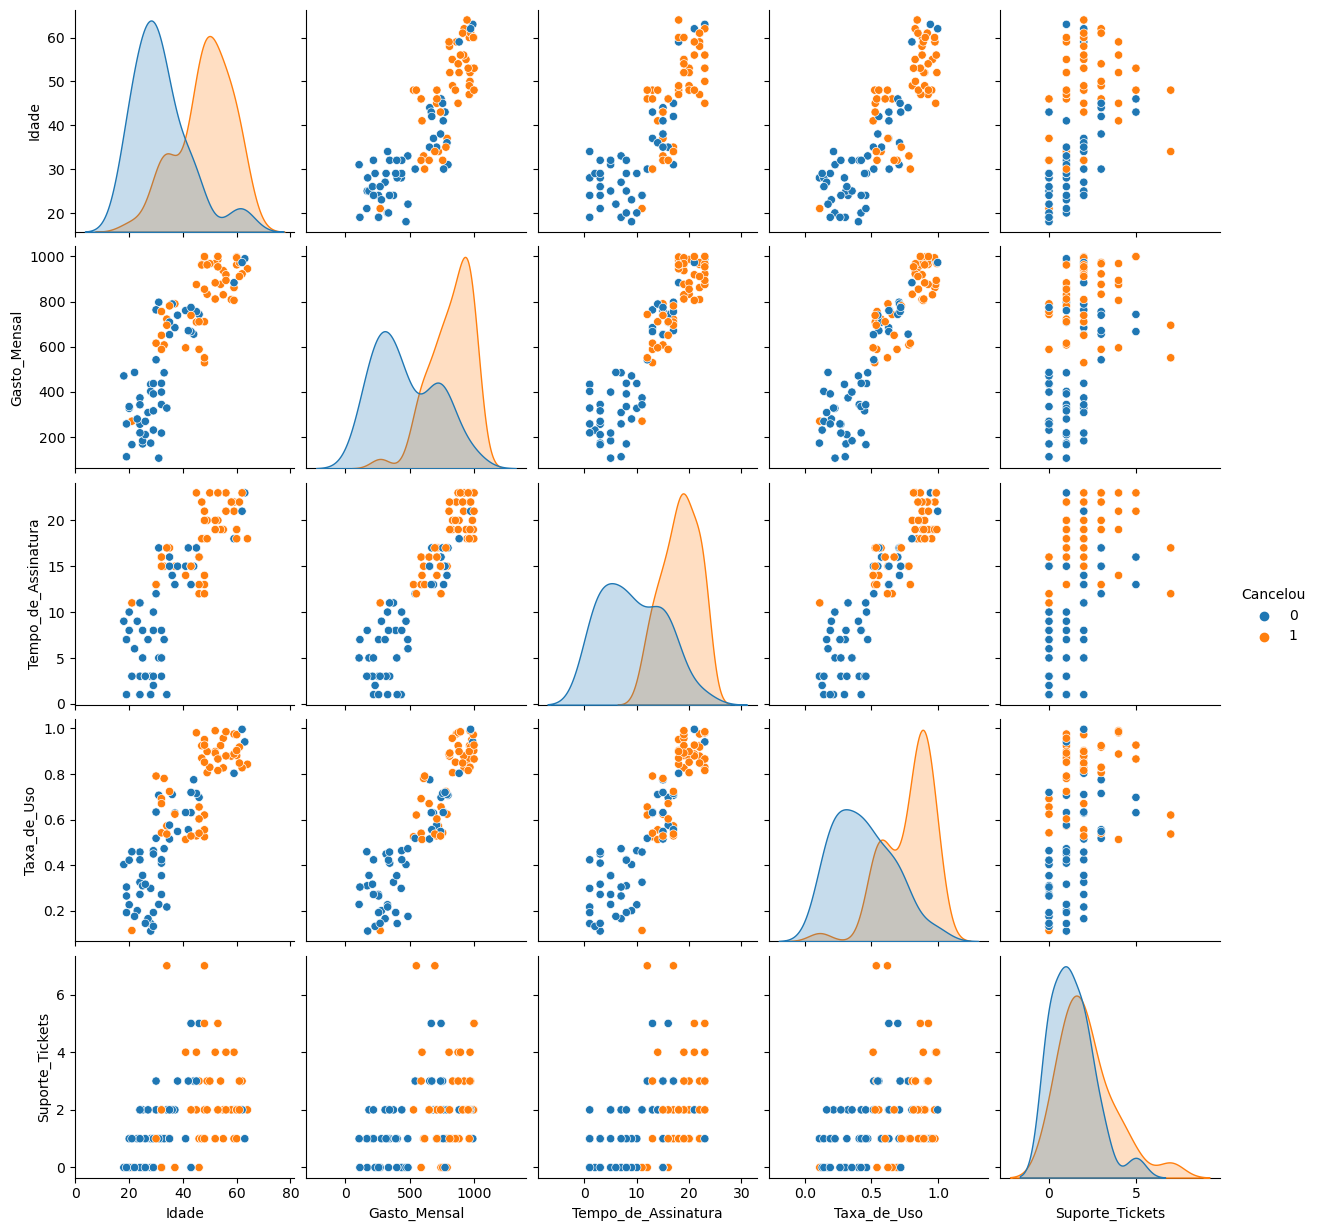

In [26]:
# Visualização de Dados com PairPlot
sns.pairplot(df_dsa, hue = 'Cancelou', diag_kind = 'kde')
plt.show()

## Definindo o Valor de K em Modelos de Clusterização

O algoritmo KMeans é uma técnica de agrupamento de dados que organiza um conjunto de pontos em grupos (ou "clusters") com base em suas semelhanças. Imagine que você tem vários pontos espalhados em um espaço e quer agrupá-los em conjuntos que sejam semelhantes entre si. O KMeans faz isso da seguinte maneira:

**Escolha Inicial**: Primeiro, você decide quantos grupos (K) você quer criar. Então, você escolhe aleatoriamente K pontos no espaço como os centros iniciais desses grupos. Esses pontos são chamados de centroides.

**Atribuição de Grupos**: Em seguida, para cada ponto no conjunto de dados, o algoritmo encontra qual dos centroides está mais próximo e atribui esse ponto ao grupo correspondente a esse centroide.

**Atualização dos Centroides**: Depois que todos os pontos são atribuídos a um grupo, o algoritmo recalcula o centro de cada grupo. O novo centroide de cada grupo é a média de todos os pontos que foram atribuídos a esse grupo.

**Repetição**: O processo de atribuição de grupos e atualização de centroides é repetido várias vezes até que os centroides parem de se mover significativamente. Isso significa que os grupos não estão mais mudando e o algoritmo encontrou uma boa organização dos pontos em clusters.

O resultado é uma divisão do conjunto de dados em K grupos, onde os pontos dentro de cada grupo são mais semelhantes entre si do que com pontos em outros grupos. 

O valor de k em métodos de agrupamento, como o K-Means, refere-se ao número de clusters que o algoritmo deve formar. 

A escolha do valor adequado de k é uma etapa importante do trabalho que estamos fazendo, pois pode afetar significativamente a utilidade dos clusters formados. 

Abaixo estão alguns métodos que podem ser usados para escolher o valor de k. Mas SEMPRE use bom senso em primeiro lugar ao escolher o número de clusters.

### Método do Cotovelo (Elbow Method)

Este é um dos métodos mais comuns para encontrar o valor ótimo de k. Ele envolve executar o algoritmo de agrupamento para diferentes valores de k e calcular a soma dos quadrados intra-cluster (SSE) para cada valor de k. O valor de k onde a redução da SSE começa a diminuir mais lentamente (o "cotovelo" da curva) é considerado o valor ótimo de k.

A soma dos quadrados intra-cluster (SSE, do inglês "Sum of Squared Errors") é uma medida que indica o quão compactos são os clusters formados em um algoritmo de agrupamento, como o KMeans. O SSE é uma forma de avaliar a qualidade dos clusters, ao quantificar o quão próximos os pontos dentro de cada cluster estão do centroide desse cluster.

Imagine que cada cluster é um círculo e os pontos dentro desse círculo são os elementos do cluster. O centro desse círculo é o centroide, que é a média de todos os pontos no cluster. O SSE mede a soma das distâncias ao quadrado de cada ponto até o centroide do seu respectivo cluster. Ou seja, para cada ponto, calcula-se a distância até o centroide, eleva-se essa distância ao quadrado e soma-se todos esses valores.

Quanto menor for o SSE, mais próximos os pontos estão dos seus centroides, indicando que os clusters são mais compactos e bem definidos. Um SSE grande, por outro lado, indica que os pontos estão mais dispersos em torno dos centroides, sugerindo que os clusters podem não ser tão bem definidos.

In [27]:
# Lista para armazenar o SSE
sse = []

In [28]:
# Range de valores de k a serem testados
k_range = range(1, 11)

In [29]:
# Testando os valores
for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

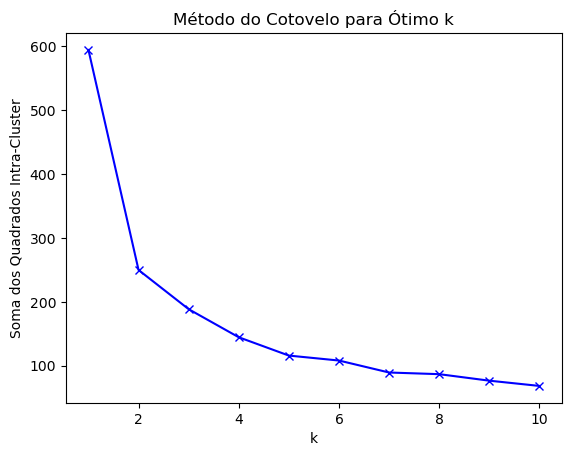

In [30]:
# Plot
plt.plot(k_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos Quadrados Intra-Cluster')
plt.title('Método do Cotovelo para Ótimo k')
plt.show()

### Método da Silhueta (Silhouette Method)

O método da Silhueta é uma técnica utilizada para avaliar a qualidade dos clusters formados em um algoritmo de agrupamento, como o KMeans. Ele fornece uma medida de quão bem um ponto foi agrupado e se ele está no cluster correto.

O cálculo da Silhueta para um ponto envolve duas distâncias:

**Coesão (a)**: A média da distância entre o ponto e todos os outros pontos no mesmo cluster. Quanto menor for esse valor, mais próximo o ponto está dos outros pontos do seu cluster, indicando uma boa coesão.

**Separação (b)**: A menor média da distância entre o ponto e os pontos em um cluster diferente. Quanto maior for esse valor, mais distante o ponto está dos pontos dos outros clusters, indicando uma boa separação.

O valor de s varia de -1 a 1:

- Um valor próximo de 1 indica que o ponto está bem agrupado dentro de seu cluster e longe dos outros clusters.
- Um valor próximo de 0 indica que o ponto está próximo à fronteira entre dois clusters.
- Um valor próximo de -1 indica que o ponto pode ter sido agrupado no cluster errado.

A média da Silhueta de todos os pontos no conjunto de dados pode ser usada como uma medida geral da qualidade do agrupamento. Quanto mais próximo de 1 for esse valor médio, melhor é a qualidade dos clusters formados. O método da Silhueta é útil para determinar o número ótimo de clusters em um conjunto de dados, pois você pode executar o algoritmo de agrupamento com diferentes números de clusters e escolher aquele que resulta na maior média da Silhueta.

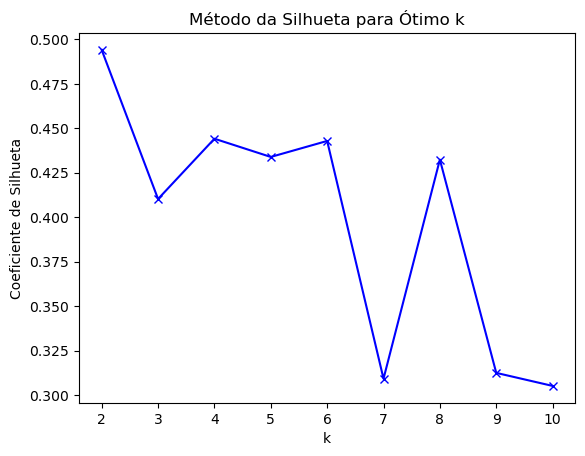

In [31]:
# Lista para o Silhouette score
sil_score = []

# Loop pelo range de valores de k a serem testados
for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_scaled)
    
    # Silhouette score não é definido para k = 1, então filtramos
    if k != 1:
        sil_score.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot
plt.plot(k_range[1:], sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta para Ótimo k')
plt.show()

## Construção da Primeira Versão do Modelo de Clusterização

In [32]:
# Modelo com 4 clusters
modelo_kmeans_dsa = KMeans(n_clusters = 4, random_state = 42)

In [33]:
# Treina o modelo e salva o resultado em uma coluna do dataframe original
df_dsa['cluster'] = modelo_kmeans_dsa.fit_predict(df_scaled)

In [34]:
# Amostra aleatória de dados
df_dsa.sample(10)

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
83,55,830.083378,19,0.956731,1,1,1
40,24,218.509402,1,0.422976,1,0,0
31,27,308.333704,7,0.164489,2,0,0
60,35,653.402720,15,0.514315,2,0,3
86,60,993.982880,19,0.972473,2,1,1
29,29,230.616308,2,0.130792,0,0,0
42,31,106.254563,5,0.227201,1,0,0
92,52,811.275099,19,0.891827,1,1,1
90,52,882.963900,20,0.898423,1,1,1
61,32,650.454888,16,0.669811,2,1,2


In [35]:
df_dsa.shape

(99, 7)

In [36]:
# Usamos o dataset original, incluindo os outliers
df_dsa_cleaned = df_dsa

In [37]:
df_dsa_cleaned.shape

(99, 7)

> Vamos criar um PairGrid.

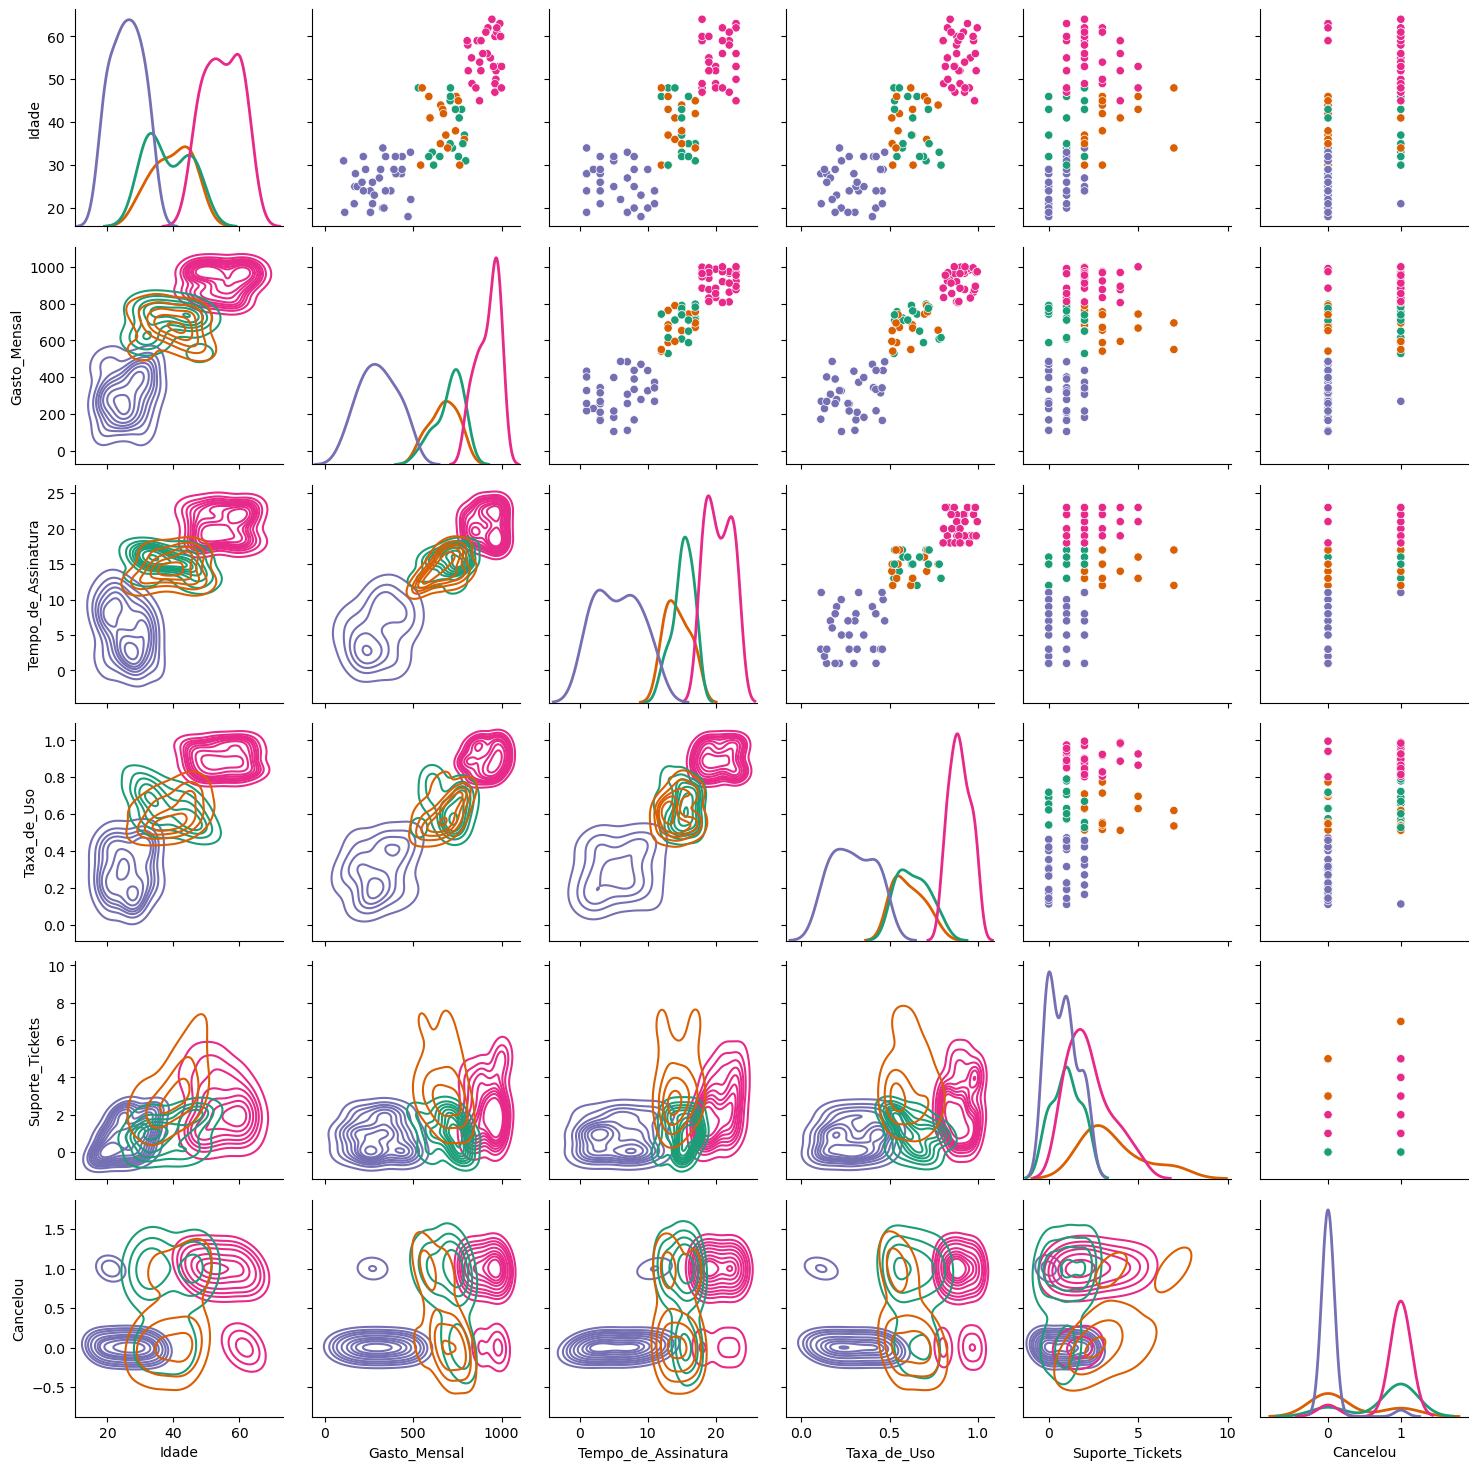

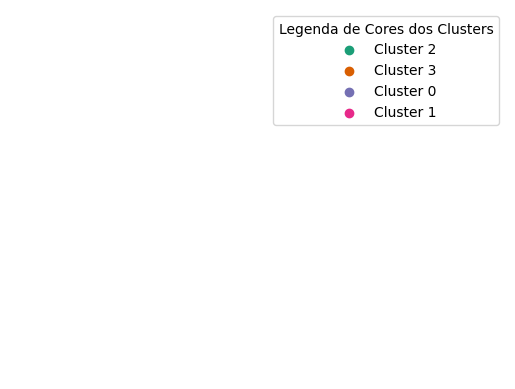

In [38]:
# Criando um mapa de cores baseado na paleta 'Dark2'
palette = sns.color_palette('Dark2', n_colors = len(df_dsa_cleaned['cluster'].unique()))
color_map = dict(zip(df_dsa_cleaned['cluster'].unique(), palette))

# Plotando o gráfico de grid com os clusters e mostrando o mapa de cores
g = sns.PairGrid(df_dsa_cleaned, hue = 'cluster', palette = color_map, diag_sharey = False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 2)
plt.show()

# Mostrando o mapa de cores
for cluster, color in color_map.items():
    plt.scatter([], [], c = [color], label = f'Cluster {cluster}')
plt.legend(title = 'Legenda de Cores dos Clusters')
plt.axis('off')
plt.show()

## Construção da Segunda Versão do Modelo de Clusterização

In [39]:
# Modelo com 3 clusters
modelo_kmeans_dsa = KMeans(n_clusters = 3, random_state = 42)

In [40]:
df_dsa.drop('cluster', axis = 1, inplace = True)

In [41]:
df_dsa.head()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
0,48,529.152948,13,0.524262,2,1
1,37,684.502168,13,0.628494,2,0
2,31,797.016155,17,0.706550,1,0
3,30,542.025205,12,0.517458,3,0
4,44,655.498896,15,0.774564,3,0


In [42]:
# Treina o modelo e salva o resultado em uma coluna do dataframe original
df_dsa['cluster'] = modelo_kmeans_dsa.fit_predict(df_scaled)

In [43]:
# Amostra aleatória de dados
df_dsa.sample(10)

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
82,60,997.455226,18,0.902798,2,1,1
85,54,876.178171,19,0.924417,3,1,1
67,60,962.759004,19,0.880697,1,1,1
43,26,269.360592,3,0.144021,0,0,0
6,34,722.230585,17,0.571936,1,1,2
87,52,968.423785,19,0.989904,4,1,1
89,56,893.738632,23,0.985318,4,1,1
19,28,402.144564,1,0.143157,1,0,0
78,58,809.043734,22,0.878449,2,1,1
65,43,738.737801,15,0.527540,2,1,2


In [44]:
# Mantém apenas as linhas que não são outliers
df_dsa_cleaned = df_dsa[~outliers]

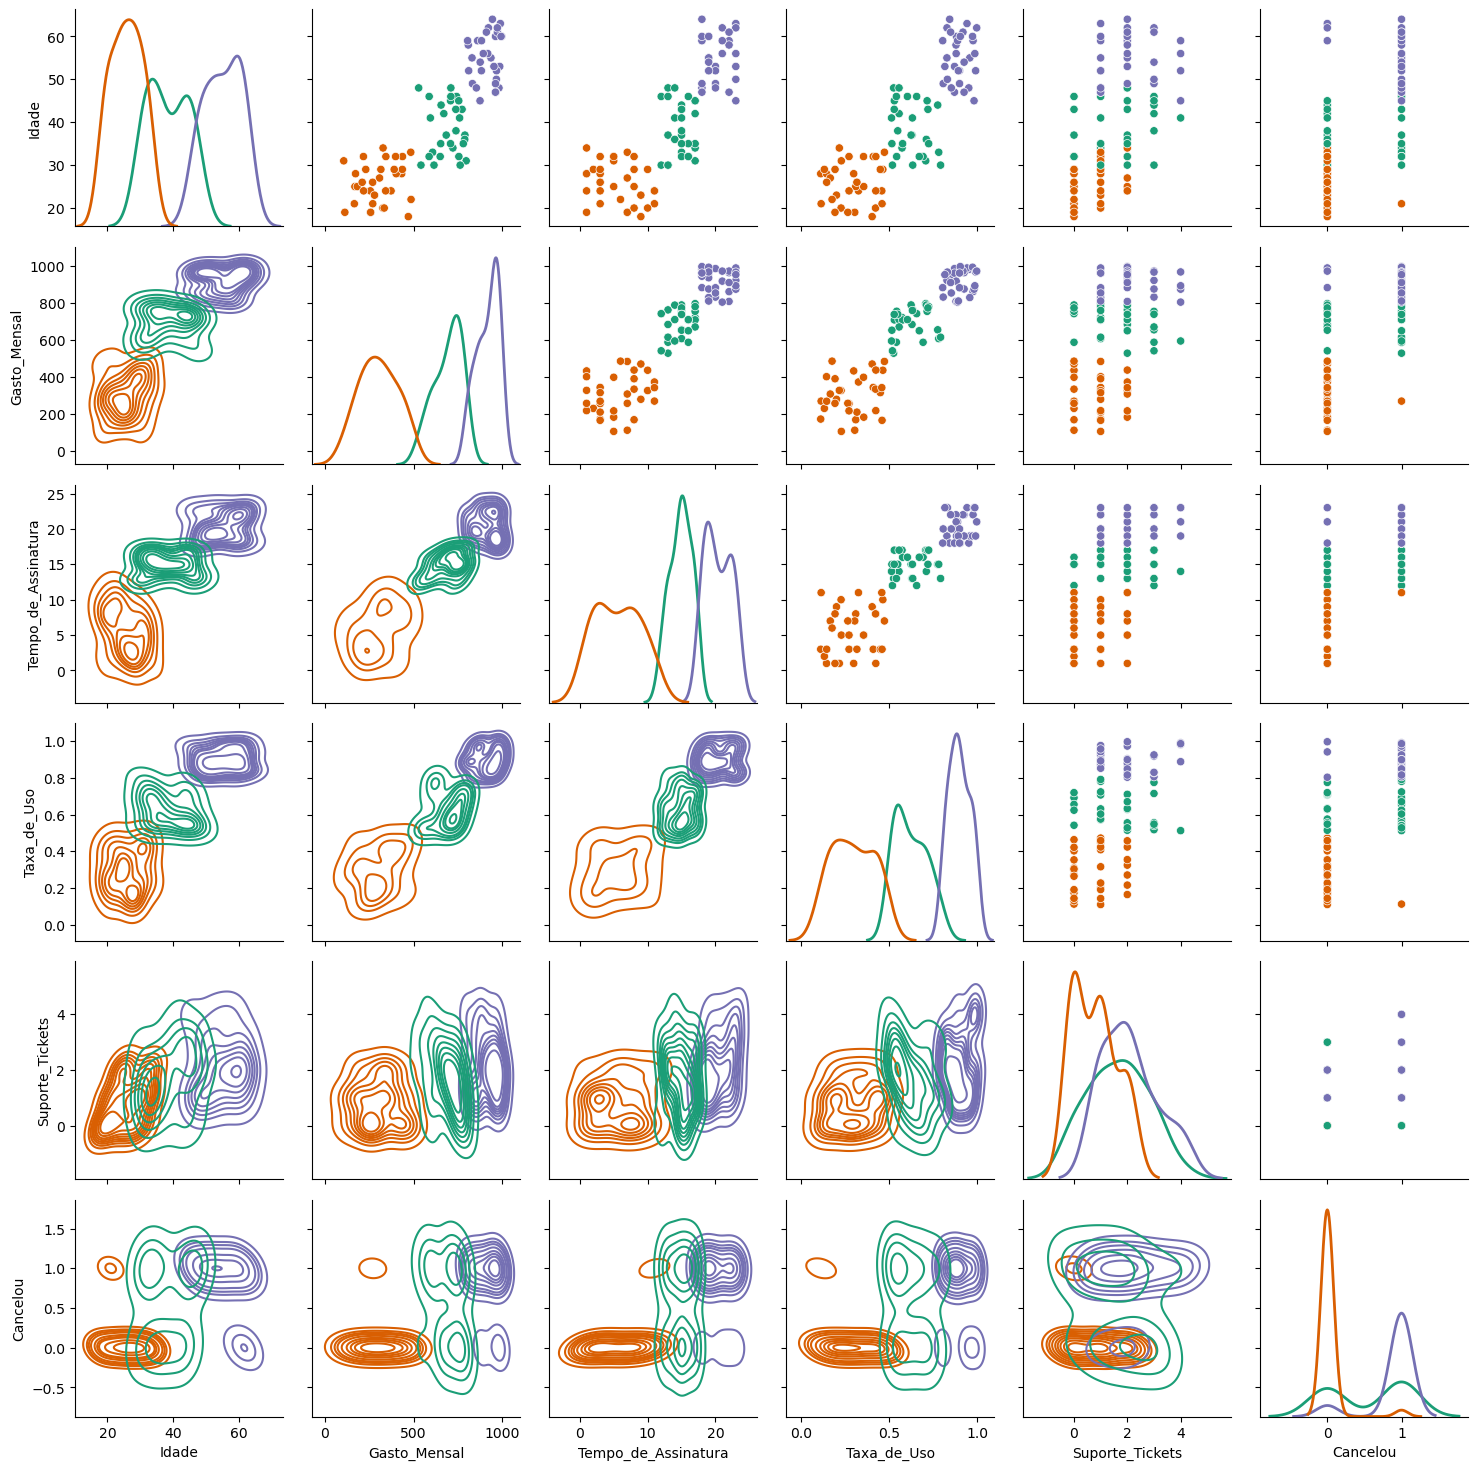

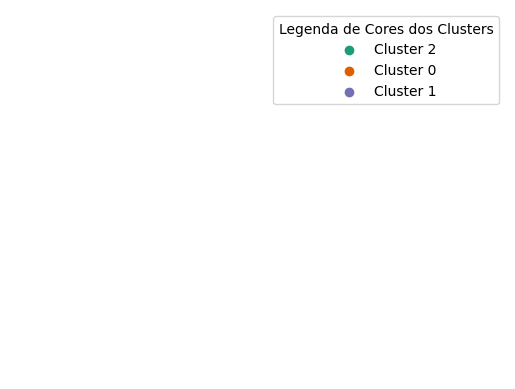

In [45]:
# Criando um mapa de cores baseado na paleta 'Dark2'
palette = sns.color_palette('Dark2', n_colors = len(df_dsa_cleaned['cluster'].unique()))
color_map = dict(zip(df_dsa_cleaned['cluster'].unique(), palette))

# Plotando o gráfico de grid com os clusters e mostrando o mapa de cores
g = sns.PairGrid(df_dsa_cleaned, hue = 'cluster', palette = color_map, diag_sharey = False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 2)
plt.show()

# Mostrando o mapa de cores
for cluster, color in color_map.items():
    plt.scatter([], [], c = [color], label = f'Cluster {cluster}')
plt.legend(title = 'Legenda de Cores dos Clusters')
plt.axis('off')
plt.show()

Analisando os gráficos podemos identificar segmentações nos usuários que cancelaram suas assinaturas. Avalie os padrões, distribuições, sobreposições entre os clusters. Faça interpretações baseadas nos agrupamentos, investigando as características predominantes em cada cluster e como elas podem estar associadas ao cancelamento da assinatura.
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
Após a interpretação, resuma os achados principais e proponha recomendações estratégicas baseadas nos insights obtidos, como por exemplo, estratégias de retenção direcionadas a cada segmento identificado.

## Analisando os Clusters do Modelo Escolhido
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
Vamos fazer agora uma análise dos clusters.

In [46]:
df_dsa_cleaned.head(5)

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
0,48,529.152948,13,0.524262,2,1,2
1,37,684.502168,13,0.628494,2,0,2
2,31,797.016155,17,0.706550,1,0,2
3,30,542.025205,12,0.517458,3,0,2
4,44,655.498896,15,0.774564,3,0,2


In [47]:
df_dsa_cleaned.sample(5)

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
74,62,922.683039,23,0.827274,3,1,1
39,26,210.399673,3,0.315737,1,0,0
41,21,166.106776,3,0.458437,1,0,0
60,35,653.402720,15,0.514315,2,0,2
35,29,315.876853,3,0.448584,1,0,0


In [48]:
df_dsa_cleaned[df_dsa_cleaned.cluster == 0].head()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
13,24,373.305408,11,0.324511,2,0,0
14,32,343.998663,3,0.408387,1,0,0
15,28,433.277965,1,0.297518,0,0,0
16,25,169.345861,8,0.309093,0,0,0
17,24,256.424243,3,0.271016,0,0,0


In [49]:
df_dsa_cleaned[df_dsa_cleaned.cluster == 0].mean()

Idade                   25.848485
Gasto_Mensal           302.863443
Tempo_de_Assinatura      5.606061
Taxa_de_Uso              0.293108
Suporte_Tickets          0.787879
Cancelou                 0.030303
cluster                  0.000000
dtype: float64

In [50]:
df_dsa_cleaned[df_dsa_cleaned.cluster == 1].head()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
66,59,861.905523,22,0.975331,1,1,1
67,60,962.759004,19,0.880697,1,1,1
68,55,936.946235,19,0.826803,2,1,1
69,49,832.523388,20,0.805757,3,1,1
70,48,982.185437,18,0.951027,1,1,1


In [51]:
df_dsa_cleaned[df_dsa_cleaned.cluster == 1].mean()

Idade                   55.129032
Gasto_Mensal           919.013690
Tempo_de_Assinatura     20.387097
Taxa_de_Uso              0.897477
Suporte_Tickets          2.096774
Cancelou                 0.903226
cluster                  1.000000
dtype: float64

In [52]:
df_dsa_cleaned[df_dsa_cleaned.cluster == 2].head()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
0,48,529.152948,13,0.524262,2,1,2
1,37,684.502168,13,0.628494,2,0,2
2,31,797.016155,17,0.706550,1,0,2
3,30,542.025205,12,0.517458,3,0,2
4,44,655.498896,15,0.774564,3,0,2


In [53]:
df_dsa_cleaned[df_dsa_cleaned.cluster == 2].mean()

Idade                   38.448276
Gasto_Mensal           694.101019
Tempo_de_Assinatura     14.896552
Taxa_de_Uso              0.622873
Suporte_Tickets          1.655172
Cancelou                 0.551724
cluster                  2.000000
dtype: float64

### Centróides dos Clusters

Primeiro, você pode examinar os centroides de cada cluster para identificar quais características são predominantes em cada grupo.

In [54]:
# Extrai os centróides
centroides = modelo_kmeans_dsa.cluster_centers_

A saída abaixo refere-se aos centroides dos clusters encontrados pelo algoritmo KMeans. Os centroides são os pontos centrais de cada cluster e são usados pelo algoritmo para determinar a qual cluster uma determinada observação pertence, com base na menor distância euclidiana.

Dado o output, nós temos 3 clusters (porque há 3 linhas de números) e cada cluster tem 6 características (porque há 6 números em cada linha).

In [55]:
print(centroides)

[[-1.07807472 -1.24869086 -1.22447918 -1.1858289  -0.64861907 -0.92934034]
 [ 1.14865372  1.05786786  1.04142262  1.11634458  0.35503359  0.82832509]
 [-0.07057899  0.19082299  0.18305656  0.06948432  0.29358547  0.10101525]]


**Interpretação**:

- O Cluster 0 (primeira linha) contém em sua maioria clientes do grupo que não cancelou a assinatura. Os valores são negativos e inferiores a -1 para a maioria das dimensões, o que sugere que as observações neste cluster têm valores inferiores à média para estas dimensões.

----

- O Cluster 1 (segunda linha) contém em sua maioria clientes do grupo que cancelou a assinatura. Os valores são positivos e superiores a 1 para a maioria das dimensões, o que sugere que as observações neste cluster têm valores superiores à média para estas dimensões.

----

- O Cluster 2 (terceira linha) contém em sua maioria clientes de ambos os grupos, cancelou e não cancelou. Observe que os valores estão próximos de 0, o que sugere que este cluster pode estar centrado próximo à média do conjunto de dados. Esse é o grupo intermediário.

A interpretação acima é baseada na suposição de que os dados foram normalizados ou padronizados. Se os dados não foram normalizados/padronizados, a interpretação pode ser diferente.

Além disso, para obter uma compreensão mais clara do que cada cluster representa em termos de seus dados originais, você pode analisar as observações dentro de cada cluster e tentar identificar padrões ou características comuns. É o que faremos a seguir.

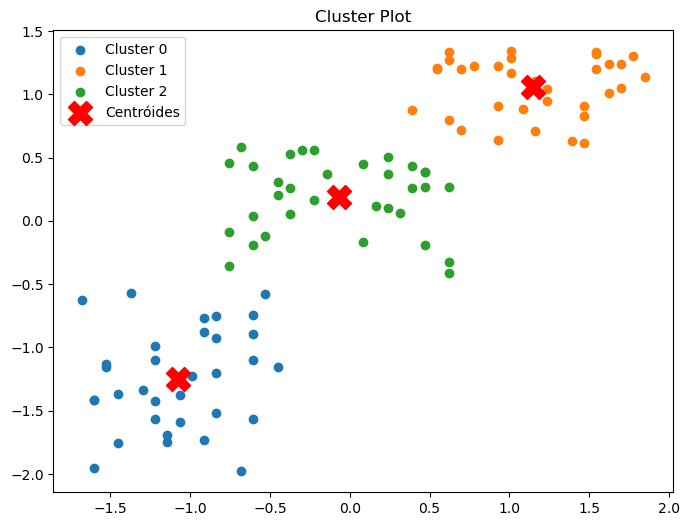

In [56]:
# Cria a figura
plt.figure(figsize = (8, 6))

# Loop pelos clusters
for cluster_num in range(3):
    mask = df_dsa['cluster'] == cluster_num
    plt.scatter(df_scaled[mask].iloc[:, 0], df_scaled[mask].iloc[:, 1], label = f'Cluster {cluster_num}')

# Plot
plt.scatter(modelo_kmeans_dsa.cluster_centers_[:, 0], 
            modelo_kmeans_dsa.cluster_centers_[:, 1], 
            s = 300, 
            c = 'red', 
            marker = 'X', 
            label = 'Centróides')
plt.legend()
plt.title("Cluster Plot")
plt.show()

Veja quantas observações foram atribuídas a cada cluster para entender o tamanho deles.

In [57]:
df_dsa['cluster'].value_counts()

cluster
2    33
0    33
1    33
Name: count, dtype: int64

### Análise de Silhueta

Uma métrica útil para avaliar a qualidade dos clusters é a análise de silhueta. Valores mais próximos de 1 indicam que os pontos de dados são muito semelhantes aos outros pontos de dados no mesmo cluster e muito diferentes dos pontos de dados nos outros clusters. Já valores negativos indicam que os pontos de dados podem ter sido agrupados no cluster errado.

In [58]:
df_dsa.groupby('cluster').mean()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
cluster,,,,,,
0,25.848485,302.863443,5.606061,0.293108,0.787879,0.030303
1,54.848485,923.899857,20.484848,0.897401,2.272727,0.909091
2,38.969697,690.449726,14.848485,0.622612,2.181818,0.545455


In [59]:
score = silhouette_score(df_scaled, df_dsa['cluster'])
print(score)

0.41846445080765354


### 2D Scatter Plot (Para 2 características)

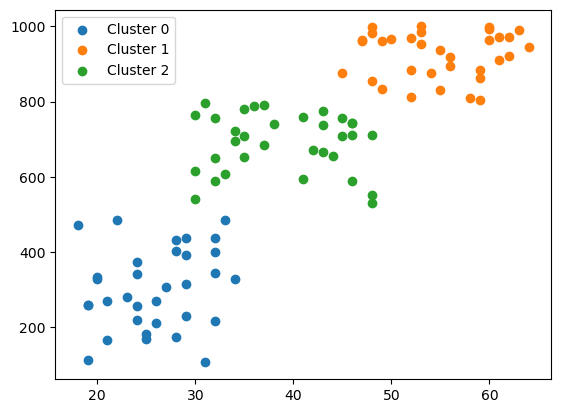

In [60]:
# Plot
plt.scatter(df_dsa[df_dsa['cluster'] == 0]['Idade'], df_dsa[df_dsa['cluster'] == 0]['Gasto_Mensal'], label='Cluster 0')
plt.scatter(df_dsa[df_dsa['cluster'] == 1]['Idade'], df_dsa[df_dsa['cluster'] == 1]['Gasto_Mensal'], label='Cluster 1')
plt.scatter(df_dsa[df_dsa['cluster'] == 2]['Idade'], df_dsa[df_dsa['cluster'] == 2]['Gasto_Mensal'], label='Cluster 2')
plt.legend()
plt.show()

### 3D Scatter Plot (Para 3 características)

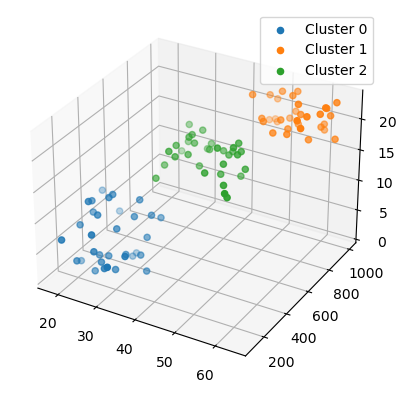

In [61]:
# Plot 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_dsa[df_dsa['cluster'] == 0]['Idade'], df_dsa[df_dsa['cluster'] == 0]['Gasto_Mensal'], df_dsa[df_dsa['cluster'] == 0]['Tempo_de_Assinatura'], label='Cluster 0')
ax.scatter(df_dsa[df_dsa['cluster'] == 1]['Idade'], df_dsa[df_dsa['cluster'] == 1]['Gasto_Mensal'], df_dsa[df_dsa['cluster'] == 1]['Tempo_de_Assinatura'], label='Cluster 1')
ax.scatter(df_dsa[df_dsa['cluster'] == 2]['Idade'], df_dsa[df_dsa['cluster'] == 2]['Gasto_Mensal'], df_dsa[df_dsa['cluster'] == 2]['Tempo_de_Assinatura'], label='Cluster 2')

ax.legend()
plt.show()

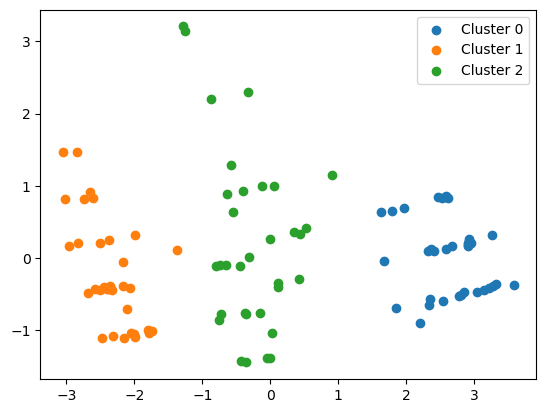

In [62]:
# Visualização com PCA
from sklearn.decomposition import PCA

# Cria o modelo PCA com 2 componentes principais
pca = PCA(n_components = 2)

# Treina o modelo usando dados padronizados
principalComponents = pca.fit_transform(df_scaled)

# Cria o dataframe com o resultado
df_principal = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
df_principal['cluster'] = df_dsa['cluster']

# Cria o gráfico
plt.scatter(df_principal[df_principal['cluster'] == 0]['PC 1'], df_principal[df_principal['cluster'] == 0]['PC 2'], label='Cluster 0')
plt.scatter(df_principal[df_principal['cluster'] == 1]['PC 1'], df_principal[df_principal['cluster'] == 1]['PC 2'], label='Cluster 1')
plt.scatter(df_principal[df_principal['cluster'] == 2]['PC 1'], df_principal[df_principal['cluster'] == 2]['PC 2'], label='Cluster 2')
plt.legend()
plt.show()

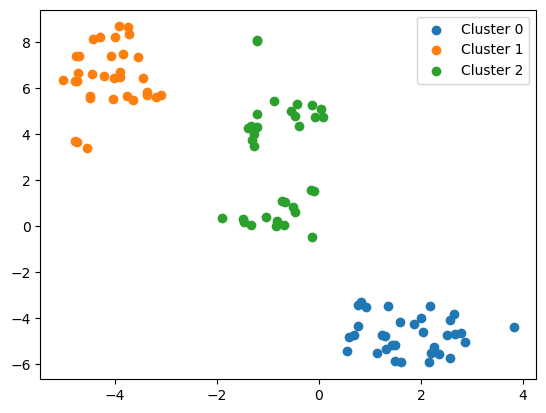

In [63]:
# Visualização com t-SNE (t-distributed Stochastic Neighbor Embedding) 
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
tsne_results = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data = tsne_results, columns = ['tsne 1', 'tsne 2'])
df_tsne['cluster'] = df_dsa['cluster']

plt.scatter(df_tsne[df_tsne['cluster'] == 0]['tsne 1'], df_tsne[df_tsne['cluster'] == 0]['tsne 2'], label='Cluster 0')
plt.scatter(df_tsne[df_tsne['cluster'] == 1]['tsne 1'], df_tsne[df_tsne['cluster'] == 1]['tsne 2'], label='Cluster 1')
plt.scatter(df_tsne[df_tsne['cluster'] == 2]['tsne 1'], df_tsne[df_tsne['cluster'] == 2]['tsne 2'], label='Cluster 2')
plt.legend()
plt.show()

### Cluster Plot

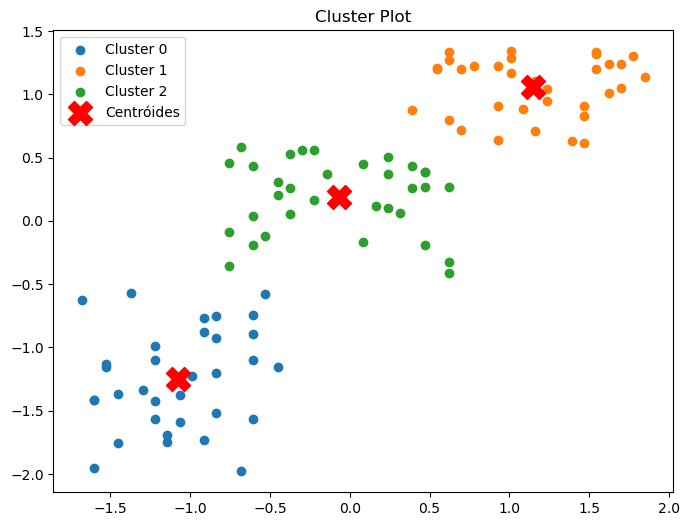

In [64]:
# Cria a figura
plt.figure(figsize = (8, 6))

# Loop pelos clusters
for cluster_num in range(3):
    mask = df_dsa['cluster'] == cluster_num
    plt.scatter(df_scaled[mask].iloc[:, 0], df_scaled[mask].iloc[:, 1], label = f'Cluster {cluster_num}')

# Plot
plt.scatter(modelo_kmeans_dsa.cluster_centers_[:, 0], 
            modelo_kmeans_dsa.cluster_centers_[:, 1], 
            s = 300, 
            c = 'red', 
            marker = 'X', 
            label = 'Centróides')
plt.legend()
plt.title("Cluster Plot")
plt.show()

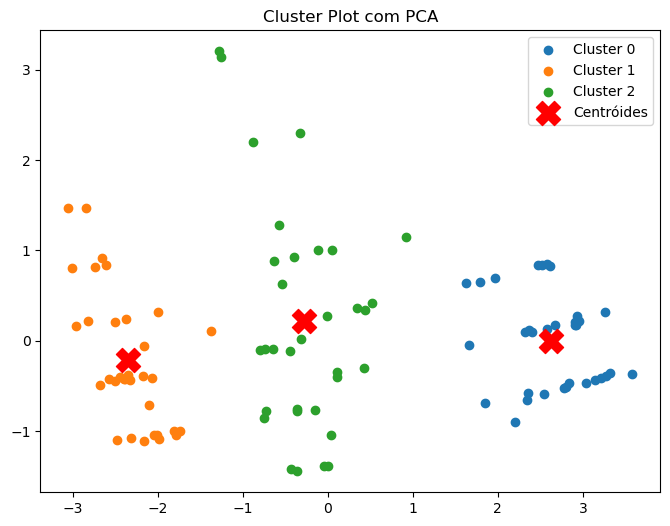

In [65]:
# Para mais de 2 dimensões usamos PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_result = pca.fit_transform(df_scaled)

df_dsa['pca_1'] = pca_result[:, 0]
df_dsa['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))

for cluster_num in range(3):
    mask = df_dsa['cluster'] == cluster_num
    plt.scatter(df_dsa[mask]['pca_1'], df_dsa[mask]['pca_2'], label = f'Cluster {cluster_num}')

# Obtenha os centroides transformados para a visualização
centroids_pca = pca.transform(modelo_kmeans_dsa.cluster_centers_)
plt.scatter(centroids_pca[:, 0], 
            centroids_pca[:, 1], 
            s = 300, 
            c = 'red', 
            marker = 'X', 
            label = 'Centróides')
plt.legend()
plt.title("Cluster Plot com PCA")
plt.show()

In [66]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [67]:
#%watermark -v -m

In [68]:
#%watermark --iversions

# Fim